In [1]:
import numpy as np
from scipy.linalg import svd, qr, eig, eigh, pinv
from scipy.linalg import inv as inv
from scipy.sparse.linalg import svds
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

import DMD_JCL as DMD_JCL
import importlib
importlib.reload(DMD_JCL)

import data_analysis
importlib.reload(data_analysis)

%matplotlib inline
matplotlib.pyplot.rc('text', usetex=True)

fontsize = 18

In [2]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/'

simulation = Simulation(current_directory)
time, x, z, u, w, T, umean, wmean = simulation.import_data()

h, l = np.shape(x)
m = len(time)

# Jean-Christophe Loiseau' version

In [96]:
from code.DMD_JCL import dmd_analysis, evd_dmd


uf = np.zeros((u.shape[0],u.shape[1]*u.shape[2]))
for i in range(u.shape[0]):
  uf[i] = w[i].flatten()
print(u.shape,uf.shape,u.shape[1]+u.shape[2])

# --> apply DMD algorithm
rank = 10
sigma, P, Q = dmd_analysis(np.swapaxes(uf,0,1), y=None, rank=rank, rtol=1e-6)
print(P.shape,sigma.shape)
Phi, Psi, mu = evd_dmd(P, Q)
print(Phi.shape,mu.shape)

(6249, 81, 51) (6249, 4131) 132
(4131, 10) (10,)
(4131, 10) (10,)


In [97]:
print(rank)

10


In [98]:
# --> reconstruct dominant dynamical modes
eigenvalues = np.zeros((rank,))
modes = []
[modes.append([]) for i in range(rank)]
for i in range(rank):
  modes[i] = np.real(Phi[:,i])
  modes[i] = modes[i].reshape((u.shape[1],u.shape[2])) 
  print(modes[i].shape)

(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)


In [101]:
print(Phi[0])

[ 3.41624430e-14+0.00000000e+00j  3.67572402e-15+2.32952045e-14j
  3.67572402e-15-2.32952045e-14j -1.96600333e-15+0.00000000e+00j
 -3.94281020e-14+6.65922090e-15j -3.94281020e-14-6.65922090e-15j
  1.93293153e-14+0.00000000e+00j -2.04197255e-14+0.00000000e+00j
  7.07882258e-14-6.49499030e-15j  7.07882258e-14+6.49499030e-15j]


In [19]:
fig, ax = plt.subplots(figsize=(10,1.5*rank),nrows=rank+1)
cf0 = ax[0].contourf(x, z, umean, levels=20, cmap=cm.nipy_spectral)
plt.colorbar(cf0)
for j in range(rank):
  cf0 = ax[j+1].contourf(x, z, modes[j], levels=20, cmap=cm.nipy_spectral)
  plt.colorbar(cf0)
[ax[j].set_aspect('equal', 'box') for j in range(rank+1)]
# [ax[j+1].set_title(f'Mode {j}, KE = {np.round(KE_mode[j]*100, 3)}%') for j in range(num_modes)]
plt.tight_layout()
plt.show()

# Naive version

In [86]:
X = np.reshape(u,(m,h*l))
X = np.swapaxes(X, 0,1)
V1, V2 = X[:, :-1], X[:, 1:]

# First svd
U, Sigma, W = svd(V1, full_matrices=False)
W = W.T.conj()
Sigma_inv = pinv(np.diag(Sigma))
S = U.T.conj() @ V2 @ W @ Sigma_inv
eigenvalues, eigenvectors = eig(S)
Phi = np.zeros(np.shape(eigenvectors))
for i in range(np.shape(eigenvectors)[1]):
    Phi[i] = U @ eigenvectors[:,i]

/tmp/ipykernel_10017/2414125969.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  Phi[i] = U @ eigenvectors[:,i]


In [93]:
indices_of_max_values = eigenvalues.argsort()[-10:][::-1]
rank = 10

# TKE = np.sum(np.real(eigenvalues))
# KE_mode = []
modes = []
[modes.append([]) for i in range(rank)]
for i,j in enumerate(indices_of_max_values):
  # KE_mode.append(np.real(eigenvalues)[j]/TKE)
  modes[i] = np.real(U @ eigenvectors[:,j])
  modes[i] = modes[i].reshape((h,l)) 
  print(modes[i].shape)

(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)


In [ ]:
fig, ax = plt.subplots(figsize=(10,1.5*rank),nrows=rank+1)
cf0 = ax[0].contourf(x, z, wmean, levels=20, cmap=cm.nipy_spectral)
plt.colorbar(cf0)
for j in range(rank):
  cf0 = ax[j+1].contourf(x, z, modes[j], levels=20, cmap=cm.nipy_spectral)
  plt.colorbar(cf0)
[ax[j].set_aspect('equal', 'box') for j in range(rank+1)]
# [ax[j+1].set_title(f'Mode {j}, KE = {np.round(KE_mode[j]*100, 3)}%') for j in range(rank)]
plt.tight_layout()
plt.show()

In [87]:
print(np.shape(S))

(4131, 4131)


#### First svd

In [10]:
print(np.shape(U), np.shape(np.swapaxes(U,0,1)))
V1 = np.swapaxes(U,0,1)
V1, V2 = V1[:, :-1], V1[:, 1:]

# First svd
U, Sigma, W = svd(V1, full_matrices=False)
W = W.T.conj()


(6249, 4131) (4131, 6249)


#### Calcul of S

In [5]:
print(np.shape(V1))
print(np.shape(U), np.shape(Sigma), np.shape(W))

(4131, 6248)
(4131, 4131) (4131,) (6248, 4131)


In [11]:
Sigma_inv = pinv(np.diag(Sigma))

In [ ]:
print(np.shape(U.T), np.shape(V2), np.shape(W), np.shape(Sigma_inv))

(4131, 4131) (4131, 6248) (6248, 4131) (4131, 4131)


In [12]:
S = U.T.conj() @ V2 @ W @ Sigma_inv

#### Eigenvectors

In [14]:
eigenvalues, eigenvectors = eig(S)

In [18]:
print(np.shape(eigenvectors), np.shape(U))

(4131, 4131) (4131, 4131)


In [15]:
Phi = np.zeros(np.shape(eigenvectors))
for i in range(np.shape(eigenvectors)[1]):
    Phi[i] = U @ eigenvectors[:,i]

/tmp/ipykernel_10017/3901067790.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  Phi[i] = U @ eigenvectors[:,i]


In [20]:
print( np.shape(Phi))

(4131, 4131)


In [8]:
indices_of_max_values = eigenvalues.argsort()[-10:][::-1]
rank = 10

# TKE = np.sum(np.real(eigenvalues))
# KE_mode = []
modes = []
[modes.append([]) for i in range(rank)]
for i,j in enumerate(indices_of_max_values):
  # KE_mode.append(np.real(eigenvalues)[j]/TKE)
  modes[i] = np.real(U @ eigenvectors[:,j])
  modes[i] = modes[i].reshape((h,l)) 
  print(modes[i].shape)

(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)


In [33]:
print(np.shape(wmean))

(6249, 81, 51)


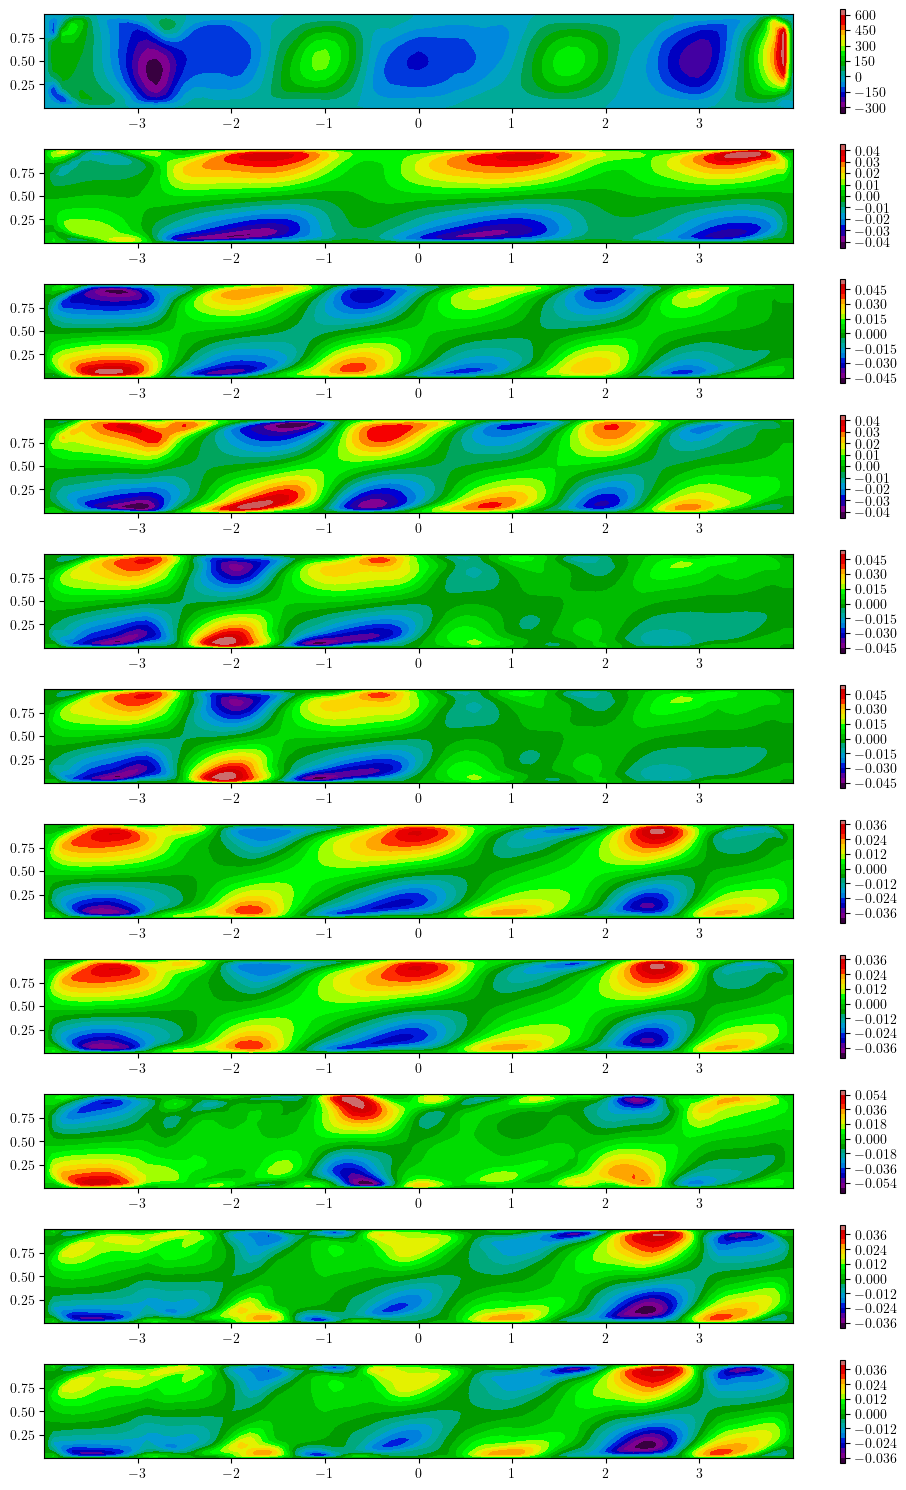

In [96]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots(figsize=(10,1.5*rank),nrows=rank+1)
cf0 = ax[0].contourf(x, z, wmean, levels=20, cmap=cm.nipy_spectral)
plt.colorbar(cf0)
for j in range(rank):
  cf0 = ax[j+1].contourf(x, z, modes[j], levels=20, cmap=cm.nipy_spectral)
  plt.colorbar(cf0)
[ax[j].set_aspect('equal', 'box') for j in range(rank+1)]
# [ax[j+1].set_title(f'Mode {j}, KE = {np.round(KE_mode[j]*100, 3)}%') for j in range(rank)]
plt.tight_layout()
plt.show()

# Cleaned

In [3]:
import DMD
importlib.reload(DMD)
from DMD import DMD

In [4]:
dmd_u = DMD(simulation)

Phi_u = dmd_u.compute_dmd(component= 'u')
reconstructed_data_u = dmd_u.reconstruct_data()
residual_norm_u = dmd_u.residual_norm()

In [5]:
dmd_w = DMD(simulation)

Phi_w = dmd_w.compute_dmd(component= 'w')
reconstructed_data_w = dmd_w.reconstruct_data()
residual_norm_w = dmd_w.residual_norm()

In [22]:
uw_array = np.stack((simulation.u,simulation.w), axis = -1)
print(np.shape(uw_array))

(6249, 81, 51, 2)


## Eigenvalues

In [6]:
eigval_u_r = np.real(dmd_u.eigenvalues)
eigval_u_i = np.imag(dmd_u.eigenvalues)
eigval_w_r = np.real(dmd_w.eigenvalues)
eigval_w_i = np.imag(dmd_w.eigenvalues)

In [14]:
eigval_u_i[5]

0.0

In [23]:
indices = [i for i in range(len(eigval_u_i)) if 1 < eigval_u_i[i]]

In [22]:
print(eigval_u_i[indices])

[0.32721347 0.43650586 0.49160776 ... 0.05104015 0.03682272 0.01597664]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


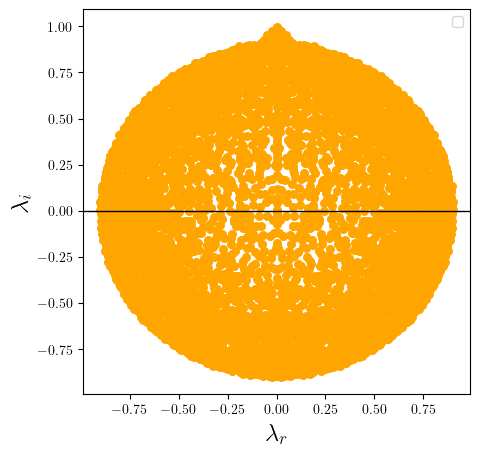

In [23]:
fig,ax = plt.subplots(figsize = (5,5))
i = 2091

N_snapshots = np.arange(3, 4003, step = 100)
N_snapshots_firsts = np.arange(3, 100, step = 10)
i = 2
ax.scatter(eigval_w_i, eigval_w_r, s = 30, c = 'orange')
# ax.set_title(r"Residual norm")
ax.axhline(0, c = 'k', linewidth = 1)

ax.set_ylabel(r"$\lambda_i$", fontsize = fontsize)
ax.set_xlabel(r"$\lambda_r$", fontsize = fontsize)
ax.legend()
# fig.tight_layout()
# plt.show()
plt.savefig('../results/DMD/residual_norm.png',dpi=300)

## Residual norm

In [ ]:
import copy
n_snapshots = len(simulation.time)
N_snapshots = np.arange(3, n_snapshots, step = 100)

simu = copy.copy(simulation)
residual_norms = []
for n in N_snapshots:
    print(n)
    simu.u = simulation.u[:n,:,:]
    simu.m = n
    dmd_simu = DMD(simu)
    Phi_simu = dmd_simu.compute_dmd()
    reconstructed_data_simu = dmd_simu.reconstruct_data()
    residual_norms.append(dmd_simu.residual_norm()/np.size(dmd_simu.X))

In [47]:
import copy
n_snapshots = 100
N_snapshots = np.arange(3, n_snapshots, step = 10)

simu = copy.copy(simulation)
residual_norms_firsts = []
for n in N_snapshots:
    print(n)
    simu.u = simulation.u[:n,:,:]
    simu.m = n
    dmd_simu = DMD(simu)
    Phi_simu = dmd_simu.compute_dmd()
    reconstructed_data_simu = dmd_simu.reconstruct_data()
    residual_norms_firsts.append(dmd_simu.residual_norm()/np.size(dmd_simu.X))

3
13
23
33
43
53
63
73


/home/julielimonet/Documents/Stage_M2/code/DMD.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  Phi[:,i] = self.U @ self.eigenvectors[:,i]


83
93


In [50]:
print(np.shape(N_snapshots_firsts))

(1,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


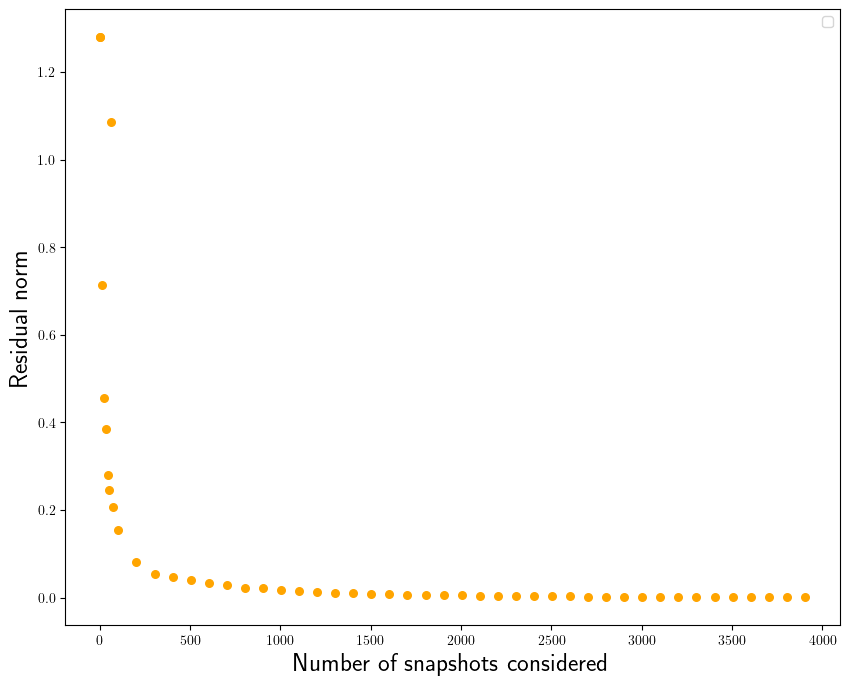

In [64]:
fig,ax = plt.subplots(figsize = (10, 8))
i = 2091

N_snapshots = np.arange(3, 4003, step = 100)
N_snapshots_firsts = np.arange(3, 100, step = 10)
i = 2
ax.scatter(N_snapshots, residual_norms, s = 30, c = 'orange')
ax.scatter(N_snapshots_firsts[:-i], residual_norms_firsts[:-i], s = 30, c = 'orange')
# ax.scatter(len(time), residual_norm/np.size(dmd.X), s = 30, c = 'orange')
# ax.axhline(residual_norm/np.size(dmd.X), label = 'uzmean', c = 'k', linewidth = 2)

# ax.set_title(r"Residual norm")
ax.set_ylabel('Residual norm', fontsize = fontsize)
ax.set_xlabel('Number of snapshots considered', fontsize = fontsize)
ax.legend()
# fig.tight_layout()
# plt.show()
plt.savefig('../results/DMD/residual_norm.png',dpi=300)

## Sort by magnitude

In [8]:
rank = 10
indices_of_max_values_u = dmd_u.eigenvalues.argsort()[-rank:][::-1]
print(np.shape(indices_of_max_values_u))


indices_of_max_values_w = dmd_w.eigenvalues.argsort()[-rank:][::-1]
print(np.shape(indices_of_max_values_w))

(10,)
(10,)


In [57]:
print(indices_of_max_values_u)
print(indices_of_max_values_w)

[  5   6   7  48  49  46  47 148 251 252]
[ 4  5  6  7  8  9 10 87 88 89]


In [82]:
dmd.eigenvalues[5]

(0.9991759518431554+0j)

In [84]:
modes = []
[modes.append([]) for i in range(rank)]
for i,j in enumerate(indices_of_max_values):
  modes[i] = np.real(dmd.U @ dmd.eigenvectors[:,j])
  modes[i] = modes[i].reshape((h,l)) 
  print(modes[i].shape)

(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)
(81, 51)


In [33]:
modes_u = np.reshape(Phi_u, ( h, l, np.shape(Phi_u)[0]))
print(np.shape(modes_u))

modes_w = np.reshape(Phi_w,  ( h, l, np.shape(Phi_w)[0]))
print(np.shape(modes_w))

(81, 51, 4131)
(81, 51, 4131)


In [25]:
print(np.shape(Phi_u))

(4131, 4131)


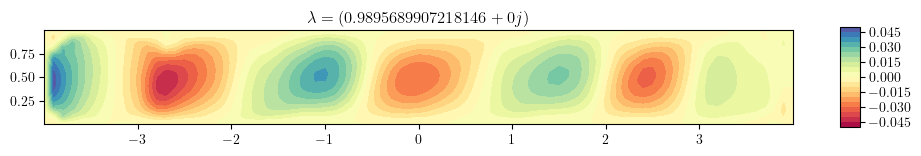

In [36]:
j = 0

indice = indices_of_max_values_u[j]

fig, ax = plt.subplots(figsize=(10,8))
cf0 = ax.contourf(x, z, modes_w[:,:,indice], levels=20, cmap=cm.Spectral)
plt.colorbar(cf0, aspect = 5, shrink = 0.13)
ax.set_aspect('equal', 'box')
ax.set_title(r"$\lambda = {}$".format(dmd_w.eigenvalues[indice]))
plt.tight_layout()
plt.savefig(f'../results/DMD/dmd_mode_w_{j}.png',dpi=200,  bbox_inches='tight')
# plt.close()

In [55]:
indices_of_max_values = (dmd_u.eigenvalues + dmd_w.eigenvalues).argsort()[-rank:][::-1]
print(indices_of_max_values)
print(indices_of_max_values_u)
print(indices_of_max_values_w)

[  5   6   7 701 700 702 645 646 699 703]
[  5   6   7  48  49  46  47 148 251 252]
[ 4  5  6  7  8  9 10 87 88 89]


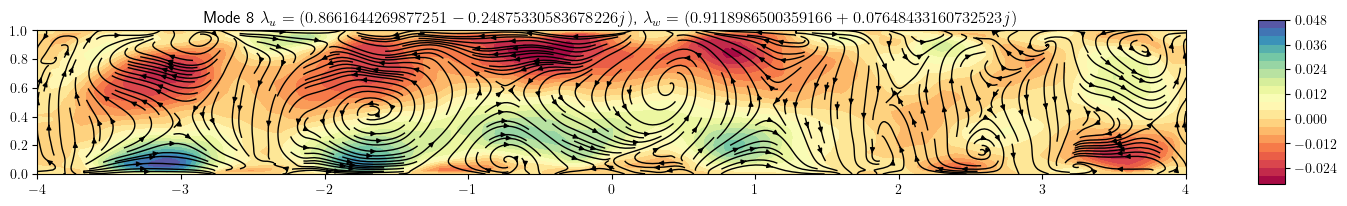

In [88]:
j = 8

indice = indices_of_max_values[j]

fig, ax = plt.subplots(figsize = (15,5))


ax.streamplot(x.T, z.T, modes_u[:,:,indice].T ,modes_w[:,:,indice].T, color = 'k', arrowsize = 0.7,linewidth = 1, density = 3)
cf0 = ax.contourf(x, z, modes_u[:,:,indice], levels=20, cmap=cm.Spectral, norm=matplotlib.colors.Normalize(vmin=modes_u[:,:,indice].min(), vmax=modes_u[:,:,indice].max()))
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6)
cbar.ax.set_aspect('auto') 
# ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
ax.set_ylim(0,1)
ax.set_xlim(-4,4)
ax.set_title(r"Mode {} $\lambda_u = {}$, $\lambda_w = {}$".format(j,dmd_u.eigenvalues[indice], dmd_w.eigenvalues[indice]))
plt.tight_layout()
plt.savefig(f'../results/DMD/dmd_mode_{j}.png',dpi=300, bbox_inches='tight')


plt.show()

In [ ]:
j = 3

indice_u = indices_of_max_values_u[j]
indice_w = indices_of_max_values_w[j]

fig, ax = plt.subplots(figsize = (15,5))


ax.streamplot(x.T, z.T, modes_u[:,:,indice_u].T ,modes_w[:,:,indice_w].T, color = 'k', arrowsize = 0.7,linewidth = 1, density = 3)
cf0 = ax.contourf(x, z, modes_u[:,:,indice_u], levels=20, cmap=cm.Spectral, norm=matplotlib.colors.Normalize(vmin=modes_u[:,:,indice].min(), vmax=modes_u[:,:,indice].max()))
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6)
cbar.ax.set_aspect('auto') 
# ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
ax.set_ylim(0,1)
ax.set_xlim(-4,4)
ax.set_title(r"Mode {} $\lambda_u = {}$, $\lambda_w = {}$".format(j,dmd_u.eigenvalues[indice_u], dmd_w.eigenvalues[indice_w]))
plt.tight_layout()
# plt.savefig(f'../results/DMD/dmd_mode_{j}.png',dpi=300, bbox_inches='tight')


plt.show()

# On pure RB

In [91]:
from data_analysis import Simulation
current_directory = '/home/julielimonet/Documents/Stage_M2/data_pureRB'

simulation_rb = Simulation(current_directory, Ra = 8, Lambda = 0)
time, x, z, u, w, T, umean, wmean = simulation_rb.import_data()

h, l = np.shape(x)
m = len(time)

In [92]:
dmd_u = DMD(simulation)

Phi_u = dmd_u.compute_dmd(component= 'u')
reconstructed_data_u = dmd_u.reconstruct_data()
residual_norm_u = dmd_u.residual_norm()

dmd_w = DMD(simulation)

Phi_w = dmd_w.compute_dmd(component= 'w')
reconstructed_data_w = dmd_w.reconstruct_data()
residual_norm_w = dmd_w.residual_norm()

In [93]:
rank = 10
indices_of_max_values_u = dmd_u.eigenvalues.argsort()[-rank:][::-1]
print(np.shape(indices_of_max_values_u))


indices_of_max_values_w = dmd_w.eigenvalues.argsort()[-rank:][::-1]
print(np.shape(indices_of_max_values_w))

(10,)
(10,)


In [94]:
modes_u = np.reshape(Phi_u, ( h, l, np.shape(Phi_u)[0]))
print(np.shape(modes_u))

modes_w = np.reshape(Phi_w,  ( h, l, np.shape(Phi_w)[0]))
print(np.shape(modes_w))

(81, 51, 4131)
(81, 51, 4131)


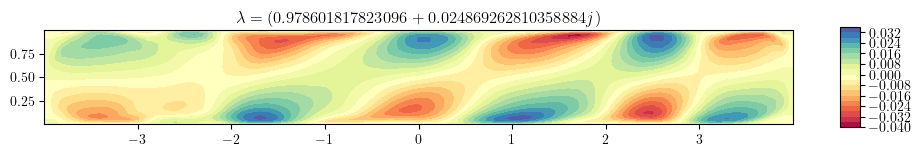

In [106]:
j = 2

indice = indices_of_max_values_u[j]

fig, ax = plt.subplots(figsize=(10,8))
cf0 = ax.contourf(x, z, modes_u[:,:,indice], levels=20, cmap=cm.Spectral)
plt.colorbar(cf0, aspect = 5, shrink = 0.13)
ax.set_aspect('equal', 'box')
ax.set_title(r"$\lambda = {}$".format(dmd_u.eigenvalues[indice]))
plt.tight_layout()
plt.savefig(f'../results/pureRB/dmd_mode_u_{j}.png',dpi=200,  bbox_inches='tight')
# plt.close()

In [107]:
indices_of_max_values = (dmd_u.eigenvalues + dmd_w.eigenvalues).argsort()[-rank:][::-1]

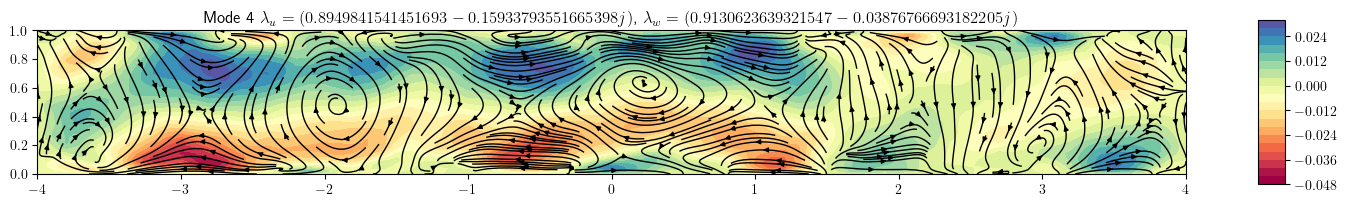

In [112]:
j = 4

indice = indices_of_max_values[j]

fig, ax = plt.subplots(figsize = (15,5))


ax.streamplot(x.T, z.T, modes_u[:,:,indice].T ,modes_w[:,:,indice].T, color = 'k', arrowsize = 0.7,linewidth = 1, density = 3)
cf0 = ax.contourf(x, z, modes_u[:,:,indice], levels=20, cmap=cm.Spectral, norm=matplotlib.colors.Normalize(vmin=modes_u[:,:,indice].min(), vmax=modes_u[:,:,indice].max()))
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6)
cbar.ax.set_aspect('auto') 
# ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
ax.set_ylim(0,1)
ax.set_xlim(-4,4)
ax.set_title(r"Mode {} $\lambda_u = {}$, $\lambda_w = {}$".format(j,dmd_u.eigenvalues[indice], dmd_w.eigenvalues[indice]))
plt.tight_layout()
plt.savefig(f'../results/pureRB/dmd_mode_{j}.png',dpi=300, bbox_inches='tight')


plt.show()

In [ ]:
j = 4

indice = indices_of_max_values[j]

fig, ax = plt.subplots(figsize = (15,5))


ax.streamplot(x.T, z.T, umean.T ,wmean.T, color = 'k', arrowsize = 0.7,linewidth = 1, density = 3)
cf0 = ax.contourf(x, z, modes_u[:,:,indice], levels=20, cmap=cm.Spectral, norm=matplotlib.colors.Normalize(vmin=modes_u[:,:,indice].min(), vmax=modes_u[:,:,indice].max()))
cbar = plt.colorbar(cf0, ax=ax, shrink=0.35, aspect = 6)
cbar.ax.set_aspect('auto') 
# ax.set_title(f'Quiver plot at t = {t}')
ax.set_aspect('equal')
ax.set_ylim(0,1)
ax.set_xlim(-4,4)
ax.set_title(r"Mode {} $\lambda_u = {}$, $\lambda_w = {}$".format(j,dmd_u.eigenvalues[indice], dmd_w.eigenvalues[indice]))
plt.tight_layout()
plt.savefig(f'../results/pureRB/dmd_mode_{j}.png',dpi=300, bbox_inches='tight')


plt.show()